In [1]:
import pandas as pd
import numpy as np

In [ ]:
df_salaries = pd.read_csv("C:/Local Code/Projects/DataScienceProject/Data Salaries/DataScience_salaries_2024.csv")
df_salaries.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L
14837,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S


In [5]:
df_chart = df_salaries["job_title"].value_counts()[:10]

In [16]:
! pip install pycountry
! pip install country_converter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import iplot
from wordcloud import WordCloud

# Geocoding
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Text processing
import nltk

# Country information
import pycountry
import country_converter as coco

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Rich console output
from rich.theme import Theme
from rich.console import Console

# For handling time in geocoding operations
import time

import networkx as nx

In [7]:
# Experience Level
experience_level_dict={'EN':'Entry-level / Junior',
                       'MI':'Mid-level / Intermediate',
                       'SE':'Senior-level / Expert',
                       'EX':'Executive-level / Director'
                      }
df_salaries['experience_level']=df_salaries['experience_level'].map(experience_level_dict)

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}
df_salaries['employment_type'] = df_salaries['employment_type'].map(employment_type_dict)

# Remote_ratio
df_salaries.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
df_salaries['remote_ratio']=df_salaries['remote_ratio'].astype(object)

#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
df_salaries.company_size=df_salaries['company_size'].map(company_size_dict)

#Employee Residence & Company location

ISO3166 = {country.alpha_2: country.name for country in pycountry.countries}
df_salaries['employee_residence'] = df_salaries['employee_residence'].map(ISO3166)
df_salaries['company_location'] = df_salaries['company_location'].map(ISO3166)

In [8]:

colors = [
    "#1d7874",
    "#679289",
    "#B7E5CB",
    "#ee2e31",
    "#ffb563",
    "#918450",
    "#966C75",
    "#4344AA",
]

#plot barchart
data = go.Bar(
    x=df_chart.index,
    y=df_chart.values,
    text=df_chart.values,
    textposition="inside",
    textfont=dict(size=12, color="black"),
    marker=dict(color=colors, opacity=0.7, line_color="black", line_width=2),
)

layout = go.Layout(
    title={
        "text": "<b>Top 10 Most Common Job Titles in the Data Science Field</b>",
        "x": 0.5,
        "xanchor": "center",
    },
    xaxis=dict(title="<b>Job title</b>"),
    yaxis=dict(title="<b>Total people</b>"),
    width=900,
    height=600,
    template="plotly_white",
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [9]:
df_chart = df_salaries.groupby(['work_year', 'remote_ratio']).size().reset_index(name='number')
# Create a line plot using Plotly
fig = px.line(
    df_chart.reset_index(),  # Ensure 'work_year' and 'remote_ratio' are columns, not indices
    x='work_year',
    y='number',
    color='remote_ratio',
    markers=True,
    title='<b>Trends in work types over the years</b>',
)

# Update layout for better formatting
fig.update_layout(
    xaxis_title="<b>Year</b>",
    title_x=0.5,
    yaxis_title="<b>Total people</b>",
    legend_title='Work types',
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)

# Customize marker style
fig.update_traces(marker=dict(size=6, color='orange', line=dict(width=2, color='black')))

# Show the plot
fig.show()


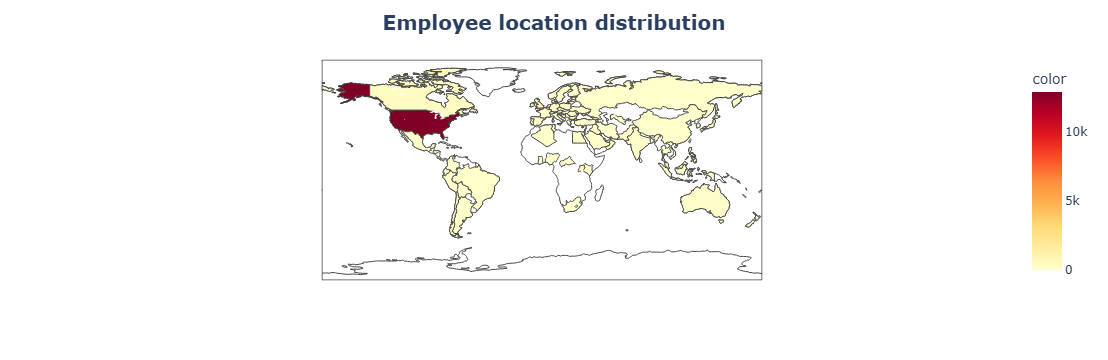

In [10]:
converted_country = coco.convert(names=df_salaries['employee_residence'], to="ISO3")
df_salaries['employee_residence'] = converted_country
df_chart = df_salaries['employee_residence'].value_counts()
fig = px.choropleth(
    locations=df_chart.index,
    color=df_chart.values,
    color_continuous_scale=px.colors.sequential.YlOrRd,  # Different color scale
    range_color=(0, df_chart.max()),  # Adjust color range
    template='seaborn',
)

fig.update_layout(
    title_text='<b>Employee location distribution</b>',
    title_font_size=20,
    title_x=0.5,
    template="plotly_white",
    showlegend=True
)
fig.show()